In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 불러오기

In [24]:
df = pd.read_csv("../[article] Construction Europe/volvo_article_final.csv")
df.shape

(40, 3)

In [25]:
df.head(2)

,Date,Title,Content
0,30 May 2023,World’s top ten construction OEMs revealed,"The latest Yellow Table, International Constru..."
1,26 May 2023,Heavy wheeled loaders: The workhorse of the co...,Heavy wheeled loaders have a home in almost ev...


In [26]:
df.tail(2)

,Date,Title,Content
38,06 December 2022,Is net zero in construction possible?,Is it possible to deliver a construction proje...
39,24 November 2022,Construction testbed for ‘fossil-free’ contrac...,An area of Stockholm city centre in Sweden wil...


### 데이터 전처리

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     40 non-null     object
 1   Title    40 non-null     object
 2   Content  40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [28]:
# Date를 날짜 타입으로 변환
df["Date"] = pd.to_datetime(df["Date"])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     40 non-null     datetime64[ns]
 1   Title    40 non-null     object        
 2   Content  40 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.1+ KB


In [30]:
df.nunique()

Date       35
Title      40
Content    40
dtype: int64

In [31]:
# 결측치 확인
df.isnull().sum()

Date       0
Title      0
Content    0
dtype: int64

### 불용어 처리

In [32]:
title_df = df[["Date" , "Title"]]
title_df.head(2)

,Date,Title
0,2023-05-30,World’s top ten construction OEMs revealed
1,2023-05-26,Heavy wheeled loaders: The workhorse of the co...


In [33]:
title_df["Word"] = title_df["Title"].map(lambda x: x.split())
title_df.head(2)

,Date,Title,Word
0,2023-05-30,World’s top ten construction OEMs revealed,"[World’s, top, ten, construction, OEMs, revealed]"
1,2023-05-26,Heavy wheeled loaders: The workhorse of the co...,"[Heavy, wheeled, loaders:, The, workhorse, of,..."


In [34]:
# 불용어 파일 불러오기
stop_words = pd.read_csv("/Users/hyejungpark/Documents/GitHub/ConstructionEquipment/common/stop_words.csv")
stop_words

,0
0,a
1,but
2,during
3,hows
4,it's
...,...
233,-
234,2023
235,2022
236,2022


In [35]:
# 불용어처리
def stop_words_out(Words):
    result = []
    for w in Words: 
        if w.strip().casefold() not in stop_words:
            result.append(w)
    return " ".join(result)

In [36]:
title_df.head(2)

,Date,Title,Word
0,2023-05-30,World’s top ten construction OEMs revealed,"[World’s, top, ten, construction, OEMs, revealed]"
1,2023-05-26,Heavy wheeled loaders: The workhorse of the co...,"[Heavy, wheeled, loaders:, The, workhorse, of,..."


In [37]:
title_df["Cleaned"] = title_df["Word"].apply(stop_words_out)
title_df["Cleaned"]

0            World’s top ten construction OEMs revealed
1     Heavy wheeled loaders: The workhorse of the co...
2     Why electric machines could be a game changer ...
3       Holcim orders up to 1,000 Volvo electric trucks
4     Digging with a twist: What are the advantages ...
5     Why America is ready for electric construction...
6     Volvo flies in electric machine for Alpine pro...
7     Online exclusive: Rokbak investigates electric...
8     Volvo CE reports global sales growth of 11% in Q1
9     Small but mighty: The role of mini and midi ex...
10            IRE 2023: what equipment will be on show?
11    Construction waste reduction: squaring the circle
12               Next-gen Rokbak haulers in development
13    Paving the way forward: what’s new in road con...
14             Volvo CE appoints new head of operations
15       Achieving peak efficiency in diesel technology
16                ConExpo-Con/Agg draws record visitors
17     Volvo Penta, Gradall team on e-excavator 

## 워드 클라우드

### 1 month

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=1200, height=800, random_state=42, background_color="white", font_path="/Arial.ttf")

In [39]:
# 1 month
a_month_title = " ".join(list(title_df.loc[title_df["Date"] > "2023-04-30"]["Cleaned"]))
a_month_title

'World’s top ten construction OEMs revealed Heavy wheeled loaders: The workhorse of the construction site Why electric machines could be a game changer for Chinese OEMs Holcim orders up to 1,000 Volvo electric trucks Digging with a twist: What are the advantages of a tiltrotator? Why America is ready for electric construction equipment'

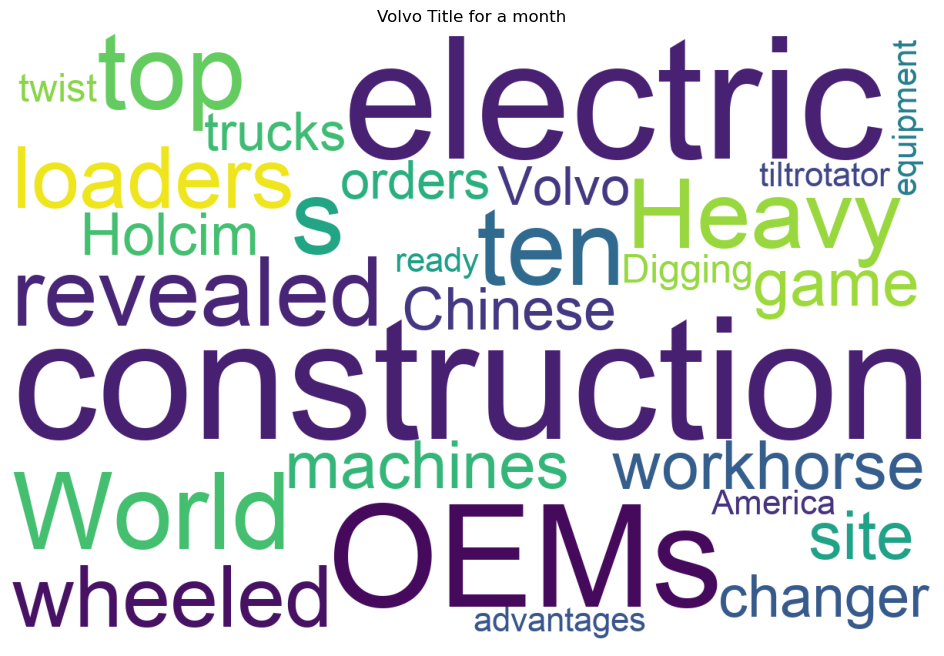

In [40]:
plt.figure(figsize=(12,8))
plt.axis("off")
plt.title("Volvo Title for a month")
plt.imshow(wc.generate(a_month_title))

### 3 months

In [41]:
three_months_title = " ".join(list(title_df.loc[title_df["Date"] >= "2023-03-01"]["Cleaned"]))
three_months_title

'World’s top ten construction OEMs revealed Heavy wheeled loaders: The workhorse of the construction site Why electric machines could be a game changer for Chinese OEMs Holcim orders up to 1,000 Volvo electric trucks Digging with a twist: What are the advantages of a tiltrotator? Why America is ready for electric construction equipment Volvo flies in electric machine for Alpine project Online exclusive: Rokbak investigates electric and hydrogen-powered articulated trucks Volvo CE reports global sales growth of 11% in Q1 Small but mighty: The role of mini and midi excavators in modern projects IRE 2023: what equipment will be on show? Construction waste reduction: squaring the circle Next-gen Rokbak haulers in development Paving the way forward: what’s new in road construction? Volvo CE appoints new head of operations Achieving peak efficiency in diesel technology ConExpo-Con/Agg draws record visitors Volvo Penta, Gradall team on e-excavator concept Volvo hails next-gen excavator as it 

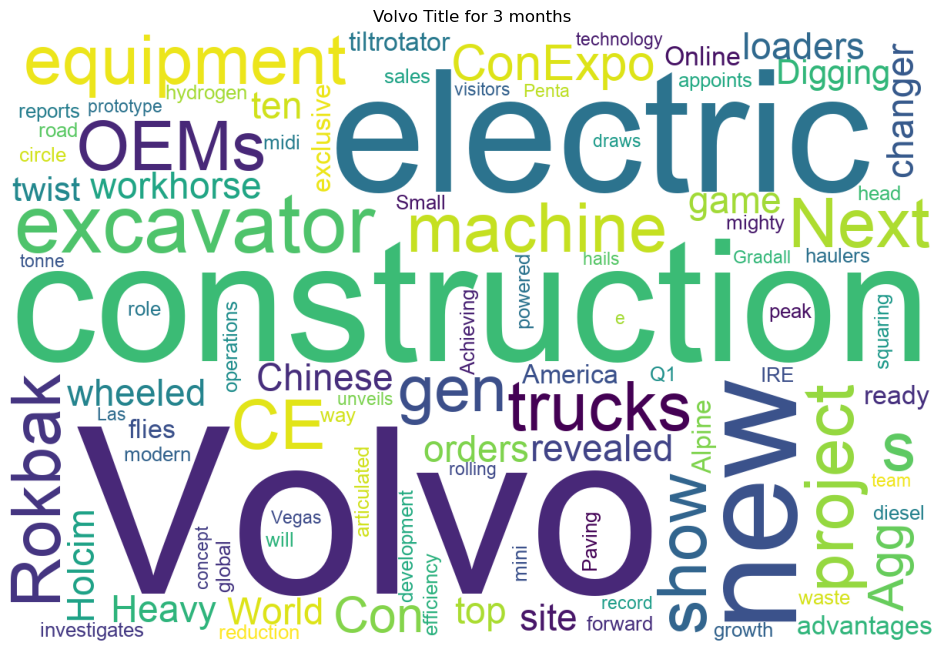

In [42]:
plt.figure(figsize=(12,8))
plt.axis("off")
plt.title("Volvo Title for 3 months")
plt.imshow(wc.generate(three_months_title))

### 6 months

In [43]:
six_months_title = " ".join(list(title_df.loc[title_df["Date"] >= "2022-12-01"]["Cleaned"]))
six_months_title


'World’s top ten construction OEMs revealed Heavy wheeled loaders: The workhorse of the construction site Why electric machines could be a game changer for Chinese OEMs Holcim orders up to 1,000 Volvo electric trucks Digging with a twist: What are the advantages of a tiltrotator? Why America is ready for electric construction equipment Volvo flies in electric machine for Alpine project Online exclusive: Rokbak investigates electric and hydrogen-powered articulated trucks Volvo CE reports global sales growth of 11% in Q1 Small but mighty: The role of mini and midi excavators in modern projects IRE 2023: what equipment will be on show? Construction waste reduction: squaring the circle Next-gen Rokbak haulers in development Paving the way forward: what’s new in road construction? Volvo CE appoints new head of operations Achieving peak efficiency in diesel technology ConExpo-Con/Agg draws record visitors Volvo Penta, Gradall team on e-excavator concept Volvo hails next-gen excavator as it 

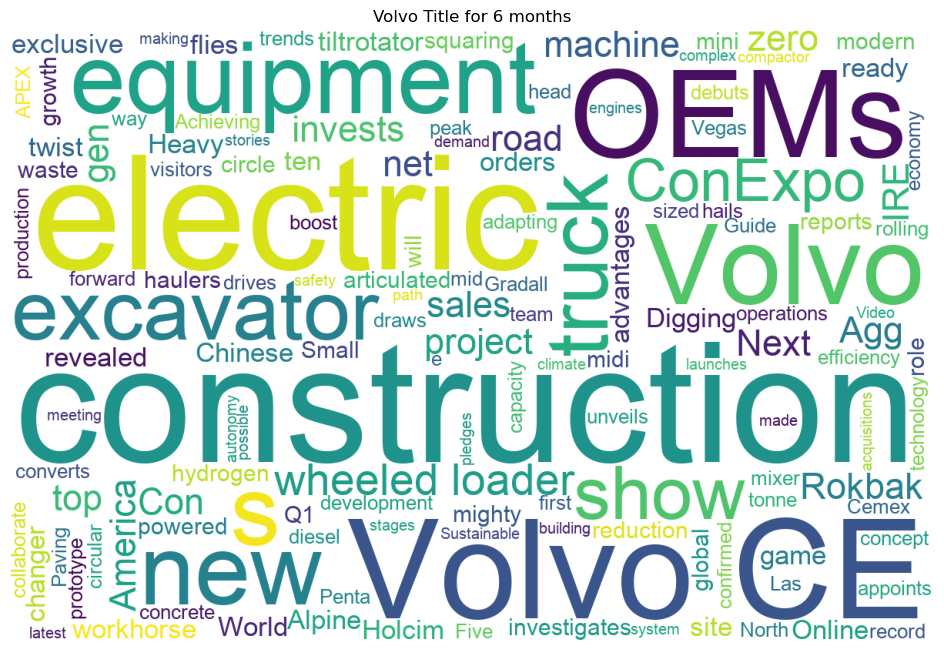

In [44]:
plt.figure(figsize=(12,8))
plt.axis("off")
plt.title("Volvo Title for 6 months")
plt.imshow(wc.generate(six_months_title))